# GRIP TASK 1 : Prediction Using Supervised ML

##### Author : Srishti Kumari

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline 
from sklearn import datasets

In [2]:
# Importing data
iris_dt = datasets.load_iris()
iris = pd.DataFrame(iris_dt.data, columns = iris_dt.feature_names)

In [3]:
# Displaying 1st 5 rows
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

In [4]:
 #Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris)
    wcss.append(kmeans.inertia_)
    

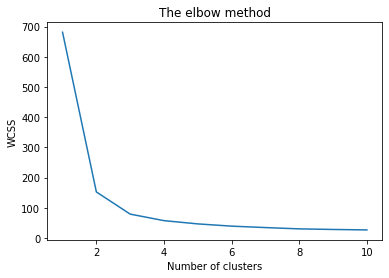

In [5]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [6]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(iris)

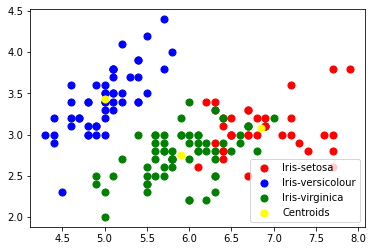

In [7]:
# Visualising the clusters - On the first two columns : sepal length & sepal width
plt.scatter(iris[y_kmeans==0]['sepal length (cm)'], iris[y_kmeans == 0]['sepal width (cm)'], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(iris[y_kmeans==1]['sepal length (cm)'], iris[y_kmeans == 1]['sepal width (cm)'], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(iris[y_kmeans==2]['sepal length (cm)'], iris[y_kmeans == 2]['sepal width (cm)'],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()

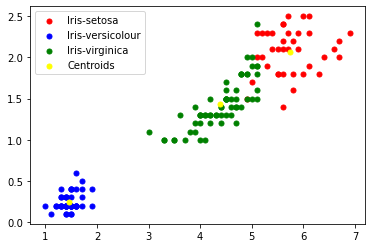

In [8]:
# Visualising the clusters - On the last two columns : petal length & petal width
plt.scatter(iris[y_kmeans==0]['petal length (cm)'], iris[y_kmeans == 0]['petal width (cm)'], 
            s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(iris[y_kmeans==1]['petal length (cm)'], iris[y_kmeans == 1]['petal width (cm)'], 
            s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(iris[y_kmeans==2]['petal length (cm)'], iris[y_kmeans == 2]['petal width (cm)'],
            s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 25, c = 'yellow', label = 'Centroids')

plt.legend()